In [1]:
# %pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('dataset_kaburajadulu.csv')
df

,text,webVideoUrl,createTime
0,"Simak nih guys! Setelah kemarin heboh, ini dia...",https://www.tiktok.com/@metro_tv/video/7473468...,1740052547
1,aigoo😹#kaburajadulu,https://www.tiktok.com/@moonfalls1/video/74701...,1739280024
2,#mandiri🇯🇵 #tgmandiri🇮🇩🇯🇵 #tokuteginou🇲🇨🇯🇵 #ka...,https://www.tiktok.com/@zetrosimanjuntak21/vid...,1740395718
3,"Membalas @arikurni 1 Kasih paham teman-teman, ...",https://www.tiktok.com/@babagenz/video/7471111...,1739503720
4,"berasa paling tinggi,sampai dia lupa diri klo ...",https://www.tiktok.com/@ramly460/video/7474754...,1740351942
...,...,...,...
1245,semangat para pejuang #kaburajadulu dan juga y...,https://www.tiktok.com/@kitajees/video/7473312...,1740016105
1246,#xybca #fyppppppppppppppppppppppp #kaburajadul...,https://www.tiktok.com/@juandaaa_pp/video/7472...,1739776609
1247,Nekat dikit atau kita gak kemana-mana😜. #kabur...,https://www.tiktok.com/@adfrmnsyh2/video/74705...,1739370701
1248,#kaburajadulu #masyaallahtabarakkallah #saudia...,https://www.tiktok.com/@cloudqcrush/video/7473...,1739957228


In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         1236 non-null   object
 1   webVideoUrl  1250 non-null   object
 2   createTime   1250 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 29.4+ KB
None
                                                text  \
0  Simak nih guys! Setelah kemarin heboh, ini dia...   
1                               aigoo😹#kaburajadulu    
2  #mandiri🇯🇵 #tgmandiri🇮🇩🇯🇵 #tokuteginou🇲🇨🇯🇵 #ka...   
3  Membalas @arikurni 1 Kasih paham teman-teman, ...   
4  berasa paling tinggi,sampai dia lupa diri klo ...   

                                         webVideoUrl  createTime  
0  https://www.tiktok.com/@metro_tv/video/7473468...  1740052547  
1  https://www.tiktok.com/@moonfalls1/video/74701...  1739280024  
2  https://www.tiktok.com/@zetrosimanjuntak21/vid...  1740395718  
3  https://www.tiktok.com/@b

In [4]:
df.isnull().sum()

text           14
webVideoUrl     0
createTime      0
dtype: int64

In [5]:

df.isna().sum()

text           14
webVideoUrl     0
createTime      0
dtype: int64

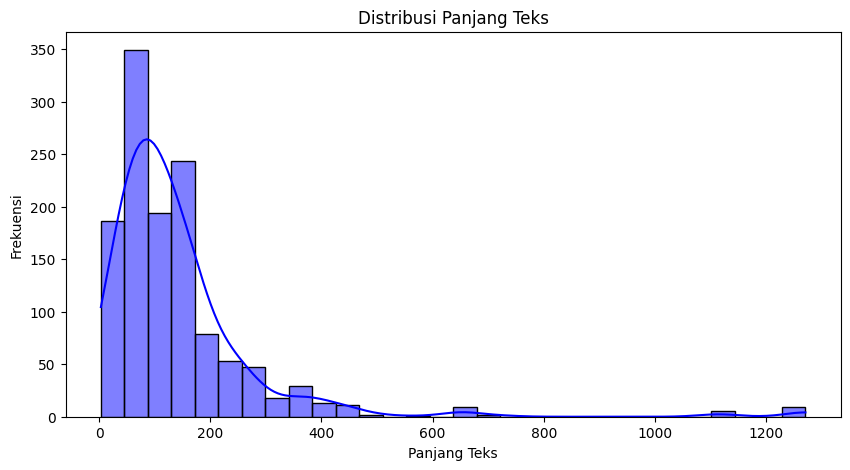

In [6]:
# Analisis panjang teks
df['text_length'] = df['text'].apply(lambda x: len(str(x)))


plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')
plt.xlabel("Panjang Teks")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Teks")
plt.show()


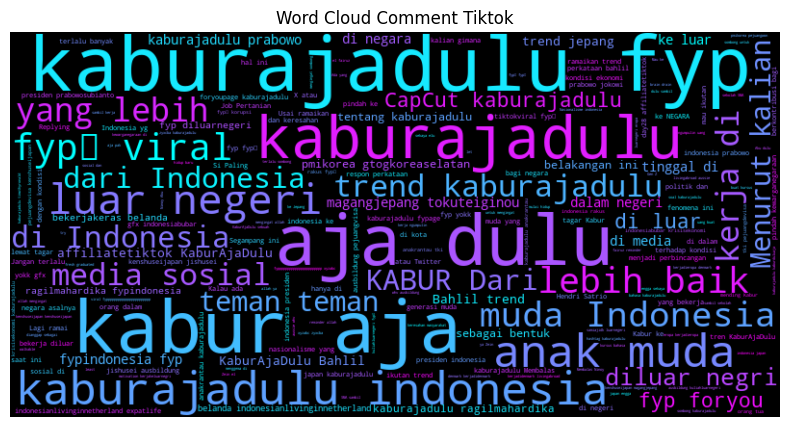

In [7]:
# WordCloud untuk melihat kata yang sering muncul
text_corpus = " ".join(df['text'].dropna().astype(str))
# Tema warna (misalnya: biru ke ungu)


stopwords = set(STOPWORDS)
stopwords.update(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                    'kalo', 'amp', 'biar', 'bikin', 'bilang',
                    'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                    'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                    'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                    'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                    'wkwk', 'wkwkwk', 'nggak', 'gakk', 'gk', 'tp', 'lg',
                    'bgt', 'dr', 'gw', 'gue', 'gpp', 'aja', 'deh', 'kok',
                    'doi', 'banget', 'bangettt', 'cuma', 'kali', 'yaa',
                    'udah', 'k', 'sy', 'm', 'bang', 'kak', 'kakak', 'min',
                    'mas', 'mba', 'mbak', 'anjay', 'anjir', 'anj', 'lah',
                    'lho', 'loh', 'lu', 'loe', 'lo', 'kamu', 'aku', 'gue',
                    'gw', 'gua', 'gue', 'kita', 'mereka', 'kalian', 'aku', 'saya',
                    'dia', 'mereka', 'kamu', 'kalian', 'kau', 'engkau', 'anda',
                    'beliau', 'ia', 'mereka', 'kita', 'ini', 'itu', 'sana', 'sini',
                    'mana', 'kapan', 'kenapa', 'bagaimana', 'berapa', 'siapa', 'dimana',
                    'apa', 'siapa', 'mana', 'kapan', 'mengapa', 'bagaimana', 'berapa',
                    'kabur', 'aja', 'dulu', 'indonesia', 'luar', 'negeri'])

wordcloud = WordCloud(width=800,height=400,background_color="black",colormap="cool",stopwords=STOPWORDS,
                      max_words=200,contour_width=3,contour_color="white").generate(text_corpus)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Comment Tiktok")
plt.show()

In [8]:
from collections import Counter
word_counts = Counter(wordcloud.words_)
top_10_words = word_counts.most_common(10)
print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count:.2f}")

Top 10 words:
kaburajadulu fyp: 1.00
kabur aja: 0.91
aja dulu: 0.86
kaburajadulu: 0.57
kaburajadulu indonesia: 0.53
anak muda: 0.53
luar negeri: 0.45
fypシ viral: 0.35
lebih baik: 0.32
muda Indonesia: 0.31


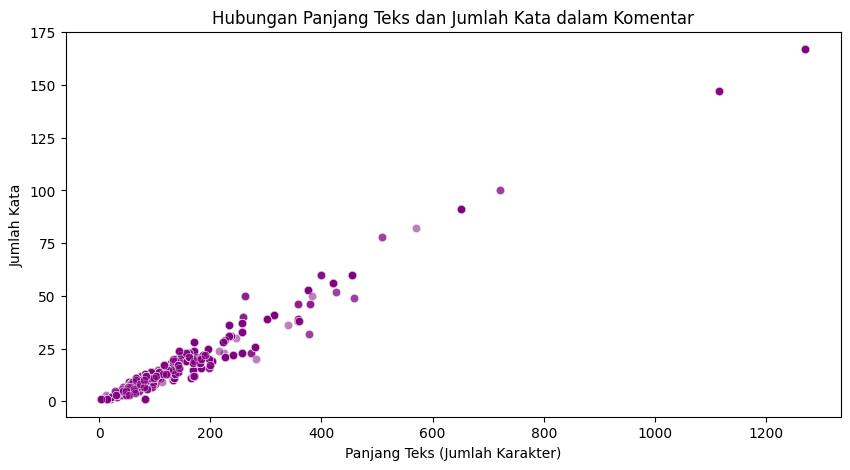

In [9]:
plt.figure(figsize=(10,5))
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

sns.scatterplot(x=df['text_length'], y=df['word_count'], alpha=0.5, color="purple")
plt.xlabel("Panjang Teks (Jumlah Karakter)")
plt.ylabel("Jumlah Kata")
plt.title("Hubungan Panjang Teks dan Jumlah Kata dalam Komentar")
plt.show()

In [10]:
#%pip install emoji==2.2.0
%pip install emoji==2.14.1


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import emoji
# Check the result of demojize
df['text'].apply(lambda x: emoji.demojize(x) if isinstance(x, str) else x).head()

0    Simak nih guys! Setelah kemarin heboh, ini dia...
1           aigoo:cat_with_tears_of_joy:#kaburajadulu 
2    #mandiri:Japan: #tgmandiri:Indonesia::Japan: #...
3    Membalas @arikurni 1 Kasih paham teman-teman, ...
4    berasa paling tinggi,sampai dia lupa diri klo ...
Name: text, dtype: object

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12820\3272849226.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(emoji_chars), y=list(emoji_counts), palette="coolwarm")
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127884 (\N{CROSSED FLAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

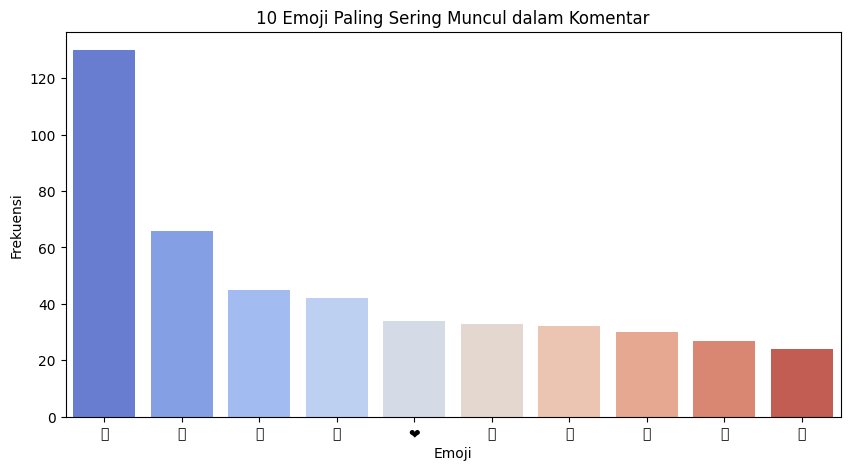

In [12]:
import emoji
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

all_emojis = [emj for text in df['text'].dropna().astype(str) for emj in extract_emojis(text)]
emoji_freq = Counter(all_emojis)
top_emojis = emoji_freq.most_common(10)
emoji_chars, emoji_counts = zip(*top_emojis)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(emoji_chars), y=list(emoji_counts), palette="coolwarm")
plt.xlabel("Emoji")
plt.ylabel("Frekuensi")
plt.title("10 Emoji Paling Sering Muncul dalam Komentar")
plt.show()

In [13]:
# Install required packages
%pip install nltk
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import re
import string
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize

In [15]:
# Ensure the NLTK stopwords list is downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [17]:
# Function to remove URLs and HTML
def remove_urls_and_html(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    return text

# Function to remove emoji
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

# Text cleansing function
def cleansing(df):
    df_clean = df.astype(str)  # Convert all entries to strings
    df_clean = df_clean.str.lower()  # Convert to lowercase
    df_clean = [re.sub(r"\d+", "", i) for i in df_clean]  # Remove digits
    df_clean = [re.sub(r'[^\w]', ' ', i) for i in df_clean]  # Remove non-alphanumeric characters
    df_clean = [re.sub(r'\s+', ' ', i) for i in df_clean]  # Replace multiple spaces with one
    df_clean = [i.strip() for i in df_clean]  # Remove leading and trailing spaces
    return df_clean

In [18]:
stopwords_list = stopwords.words('indonesian')  # Use NLTK stopwords or update with your list
stopwords_list.extend([
    "yg", "dg", "rt", "dgn", "ny", "d", "klo", "kalo", "amp", "biar", "bikin", "bilang", 
    "gak", "ga", "krn", "nya", "nih", "sih", "si", "tau", "tdk", "tuh", "utk", "ya", "jd", 
    "jgn", "sdh", "aja", "n", "t", "nyg", "hehe", "pen", "u", "nan", "loh", "rt", "wkwk", 
    "wkwkwk", "nggak", "gakk", "gk", "tp", "lg", "bgt", "dr", "gw", "gue", "gpp", "aja", "deh", 
    "kok", "doi", "banget", "bangettt", "cuma", "kali", "yaa", "udah", "k", "sy", "m", "bang", 
    "kak", "kakak", "min", "mas", "mba", "mbak", "anjay", "anjir", "anj", "lah", "lho", "loh", 
    "lu", "loe", "lo", "kamu", "aku", "gue", "gw", "gua", "gue", "kita", "mereka", "kalian", 
    "aku", "saya", "dia", "mereka", "kamu", "kalian", "kau", "engkau", "anda", "beliau", "ia", 
    "mereka", "kita", "ini", "itu", "sana", "sini", "mana", "kapan", "kenapa", "bagaimana", 
    "berapa", "siapa", "dimana", "apa", "siapa", "mana", "kapan", "mengapa", "bagaimana", 
    "berapa", "kabur", "aja", "dulu", "indonesia", "luar", "negeri"
])


In [19]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords_list]

In [22]:
# Function to tokenize text
def tokenize_text(text):
    return regexp_tokenize(text, pattern=r'\w+')

# Main function to process the dataframe
def process_dataframe(df):
    df_clean = cleansing(df['text'])
    
    # Tokenization
    df['tokens'] = df_clean.apply(tokenize_text)
    
    # Remove stopwords
    df['tokens_nostopwords'] = df['tokens'].apply(remove_stopwords)
    
    return df

In [23]:
# Display the first row's tokenized data
print(df['tokens'].iloc[0])


KeyError: 'tokens'

In [ ]:
# Check the result
df['nonstop_comment'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopwords_list])
df.head()

,text,webVideoUrl,createTime,text_length,word_count,clean_comment,tokens,tokens_nostopwords,nonstop_comment
0,"Simak nih guys! Setelah kemarin heboh, ini dia...",https://www.tiktok.com/@metro_tv/video/7473468...,1740052547,237,31,simak nih guys setelah kemarin heboh ini dia k...,"[simak, nih, guys, setelah, kemarin, heboh, in...","[simak, guys, kemarin, heboh, klarifikasi, wam...","[simak, guys, kemarin, heboh, klarifikasi, wam..."
1,aigoo😹#kaburajadulu,https://www.tiktok.com/@moonfalls1/video/74701...,1739280024,20,1,aigoo kaburajadulu,"[aigoo, kaburajadulu]","[aigoo, kaburajadulu]","[aigoo, kaburajadulu]"
2,#mandiri🇯🇵 #tgmandiri🇮🇩🇯🇵 #tokuteginou🇲🇨🇯🇵 #ka...,https://www.tiktok.com/@zetrosimanjuntak21/vid...,1740395718,57,4,mandiri tgmandiri tokuteginou kaburajadulu,"[mandiri, tgmandiri, tokuteginou, kaburajadulu]","[mandiri, tgmandiri, tokuteginou, kaburajadulu]","[mandiri, tgmandiri, tokuteginou, kaburajadulu]"
3,"Membalas @arikurni 1 Kasih paham teman-teman, ...",https://www.tiktok.com/@babagenz/video/7471111...,1739503720,167,20,membalas arikurni kasih paham teman teman tapi...,"[membalas, arikurni, kasih, paham, teman, tema...","[membalas, arikurni, kasih, paham, teman, tema...","[membalas, arikurni, kasih, paham, teman, tema..."
4,"berasa paling tinggi,sampai dia lupa diri klo ...",https://www.tiktok.com/@ramly460/video/7474754...,1740351942,120,14,berasa paling tinggi sampai dia lupa diri klo ...,"[berasa, paling, tinggi, sampai, dia, lupa, di...","[berasa, lupa, buangan, negera, kenshuseijapan...","[berasa, lupa, buangan, negera, kenshuseijapan..."


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


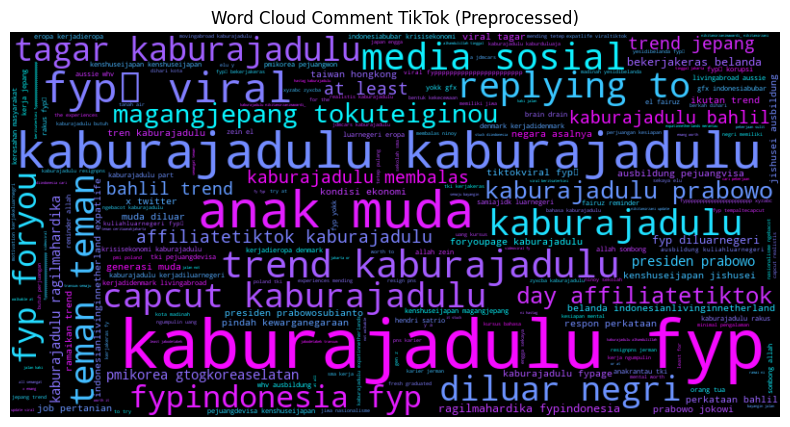

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Make sure stopwords are downloaded
nltk.download('stopwords')

# Get the stopwords from NLTK and convert it to a set
stopwords_list = set(stopwords.words('indonesian'))  # Convert to a set to avoid issues with iteration

# Combine all the tokens (without stopwords)
text_corpus_preprocessed = " ".join([" ".join(tokens) for tokens in df['tokens_nostopwords']])

# Create the word cloud
wordcloud_preprocessed = WordCloud(
    width=800, height=400, background_color="black", colormap="cool", 
    stopwords=stopwords_list, max_words=200, contour_width=3, contour_color="white"
).generate(text_corpus_preprocessed)

# Plot the wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_preprocessed, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Comment TikTok (Preprocessed)")
plt.show()


## InsetLaxiconBased

In [ ]:
import requests

#Kamus Leksikon postif dan negatif
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

pos_lex = set(pd.read_csv(positive_url, sep='\t', header=None)[0].str.lower())
neg_lex = set(pd.read_csv(negative_url, sep='\t', header=None)[0].str.lower())


def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in pos_lex)
        negative_count = sum(1 for word in text.split() if word in neg_lex)
        sentiment_score = positive_count - negative_count

        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"

        return sentiment_score, sentiment

    return 0, "Netral"

# Tentukan sentimen dan skor untuk setiap ulasan
df[['Score', 'Sentiment']] = df['clean_comment'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
df.head(5)

,text,webVideoUrl,createTime,text_length,word_count,clean_comment,tokens,tokens_nostopwords,nonstop_comment,Score,Sentiment
0,"Simak nih guys! Setelah kemarin heboh, ini dia...",https://www.tiktok.com/@metro_tv/video/7473468...,1740052547,237,31,simak nih guys setelah kemarin heboh ini dia k...,"[simak, nih, guys, setelah, kemarin, heboh, in...","[simak, guys, kemarin, heboh, klarifikasi, wam...","[simak, guys, kemarin, heboh, klarifikasi, wam...",0,Netral
1,aigoo😹#kaburajadulu,https://www.tiktok.com/@moonfalls1/video/74701...,1739280024,20,1,aigoo kaburajadulu,"[aigoo, kaburajadulu]","[aigoo, kaburajadulu]","[aigoo, kaburajadulu]",0,Netral
2,#mandiri🇯🇵 #tgmandiri🇮🇩🇯🇵 #tokuteginou🇲🇨🇯🇵 #ka...,https://www.tiktok.com/@zetrosimanjuntak21/vid...,1740395718,57,4,mandiri tgmandiri tokuteginou kaburajadulu,"[mandiri, tgmandiri, tokuteginou, kaburajadulu]","[mandiri, tgmandiri, tokuteginou, kaburajadulu]","[mandiri, tgmandiri, tokuteginou, kaburajadulu]",-1,Negatif
3,"Membalas @arikurni 1 Kasih paham teman-teman, ...",https://www.tiktok.com/@babagenz/video/7471111...,1739503720,167,20,membalas arikurni kasih paham teman teman tapi...,"[membalas, arikurni, kasih, paham, teman, tema...","[membalas, arikurni, kasih, paham, teman, tema...","[membalas, arikurni, kasih, paham, teman, tema...",-1,Negatif
4,"berasa paling tinggi,sampai dia lupa diri klo ...",https://www.tiktok.com/@ramly460/video/7474754...,1740351942,120,14,berasa paling tinggi sampai dia lupa diri klo ...,"[berasa, paling, tinggi, sampai, dia, lupa, di...","[berasa, lupa, buangan, negera, kenshuseijapan...","[berasa, lupa, buangan, negera, kenshuseijapan...",-7,Negatif


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21144\890775358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette=custom_colors)


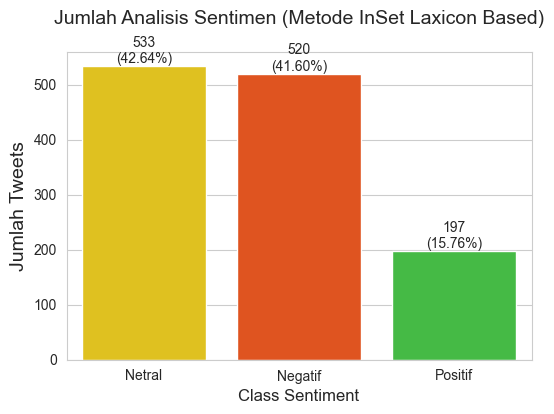

In [ ]:
sentiment_count = df['Sentiment'].value_counts()
sns.set_style('whitegrid')


custom_colors = ["#FFD700", "#FF4500", "#32CD32"]
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette=custom_colors)


plt.title("Jumlah Analisis Sentimen (Metode InSet Laxicon Based)", fontsize=14, pad=20)
plt.xlabel("Class Sentiment", fontsize=12)
plt.ylabel("Jumlah Tweets", fontsize=14)


total = len(df['Sentiment'])
for i, count in enumerate(sentiment_count.values):
    percentage = f"{100 * count / total:.2f}%"
    ax.text(i, count + 0.10, f"{count}\n({percentage})", ha='center', va='bottom')

plt.show()

In [ ]:
print(df.shape)  # Mengecek jumlah data

(1250, 11)


In [ ]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split
# Pembagian data
x_train, x_test, y_train, y_test = train_test_split(df['clean_comment'], df['Sentiment'], test_size=0.2, random_state=42)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
x_train

1194    capcut kaburajadulu indonesia kieエイジ indonesia...
911     belum bisa ikut trend kaburajadulu tapi alhamd...
422                           kabur aja dulu kaburajadulu
670     sedih tapi fakta berharap indonesia masih puny...
931     ada apaaaalah dengan negara tercinta ini kabur...
                              ...                        
1044                          kaburajadulu prabowo jokowi
1095    kalian buruan nyusul kaburajadulu workinjapan ...
1130    baru baru ini ramai menjadi perbincangan kabur...
860     kaburajadulu fyp anakrantau pmi ausbildung pej...
1126    fyp za kaburajadulu malaysia singapore taiwan ...
Name: clean_comment, Length: 1000, dtype: object

In [ ]:
x_test

680     daripada di indonesia mending kabur ke jepang ...
1102    resign pns buat memulai karier di jerman kabur...
394     hadehh fadlyfsl_ jadi garda terdepan fujiiian ...
930     utusan khusus presiden raffi ahmad ingin kampa...
497           mending kaborrr kaburajadulu kenshuseijapan
                              ...                        
382     japan engga sekaya elu sih tapi y t t a jdmcar...
678     fyp yokk gfx indonesiabubar krisisekonomi kabu...
1002    dubes jepang langsung naturalisasi aja gak sih...
361     membalas arikurni kasih paham teman teman tapi...
490     kaburajadulu nikitamirzanimawardi_ nikitamirza...
Name: clean_comment, Length: 250, dtype: object

In [ ]:
y_train

1194     Netral
911     Negatif
422      Netral
670     Negatif
931     Positif
         ...   
1044     Netral
1095    Positif
1130    Negatif
860      Netral
1126     Netral
Name: Sentiment, Length: 1000, dtype: object

In [ ]:
y_test

680     Negatif
1102    Positif
394     Positif
930     Positif
497      Netral
         ...   
382      Netral
678     Negatif
1002    Positif
361     Negatif
490      Netral
Name: Sentiment, Length: 250, dtype: object

## Text Representation
- Pada tahap ini, menggunakan 2 Text Representation representation dengan 3 Model

### Text Representation 1 : BagofWords

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x_train)
train_bow = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan hasil
print("Representasi Bag of Words:")
print(train_bow)

Representasi Bag of Words:
     _reyachmad  _reyacmad  abang  abgewandert  abroad  abwanderung  ac  \
0             0          0      0            0       0            0   0   
1             0          0      0            0       0            0   0   
2             0          0      0            0       0            0   0   
3             0          0      0            0       1            0   0   
4             0          0      0            0       0            0   0   
..          ...        ...    ...          ...     ...          ...  ..   
995           0          0      0            0       0            0   0   
996           0          0      0            0       0            0   0   
997           0          0      0            0       0            0   0   
998           0          0      0            0       0            0   0   
999           0          0      0            0       0            0   0   

     achieve  ada  adalah  ...  𝐀𝐛𝐝𝐮𝐥  𝐀𝐣𝐚  𝐂𝐔𝐄𝐊𝐈𝐍  𝐃𝐮𝐥𝐮  𝐉𝐀𝐍𝐆𝐀𝐍  𝐊𝐚𝐛𝐮𝐫 

In [ ]:
train_bow.columns

Index(['_reyachmad', '_reyacmad', 'abang', 'abgewandert', 'abroad',
       'abwanderung', 'ac', 'achieve', 'ada', 'adalah',
       ...
       '𝐀𝐛𝐝𝐮𝐥', '𝐀𝐣𝐚', '𝐂𝐔𝐄𝐊𝐈𝐍', '𝐃𝐮𝐥𝐮', '𝐉𝐀𝐍𝐆𝐀𝐍', '𝐊𝐚𝐛𝐮𝐫', '𝐌𝐀𝐇𝐀𝐒𝐈𝐒𝐖𝐀',
       '𝐒𝐨𝐦𝐚𝐝', '𝐓𝐔𝐍𝐓𝐔𝐓𝐀𝐍', '𝐔𝐬𝐭𝐚𝐝𝐳'],
      dtype='object', length=1570)

In [ ]:
x_test_bow = vectorizer.transform(x_test)
test_bow = pd.DataFrame(x_test_bow.toarray(), columns=vectorizer.get_feature_names_out())

### BagOFWords Machine Learning

#### 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(train_bow, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_rf_class = rf_class.predict(test_bow)

In [ ]:
from sklearn.metrics import classification_report
print('\nRandom Forest Classification Report\n')
print(classification_report(y_test, test_rf_class, target_names=['Negatif','Netral','Positif']))


Random Forest Classification Report

              precision    recall  f1-score   support

     Negatif       0.99      1.00      1.00       106
      Netral       0.98      1.00      0.99       101
     Positif       1.00      0.93      0.96        43

    accuracy                           0.99       250
   macro avg       0.99      0.98      0.98       250
weighted avg       0.99      0.99      0.99       250



#### 2. SVM

In [ ]:
from sklearn import svm
svm_class1 = svm.LinearSVC( random_state=42)
svm_class1.fit(train_bow, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [ ]:
test_svm_class1=svm_class1.predict(test_bow)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, test_svm_class1, target_names=['Negatif','Netral','Positif']))


Classification Report

              precision    recall  f1-score   support

     Negatif       0.99      1.00      1.00       106
      Netral       0.98      1.00      0.99       101
     Positif       1.00      0.93      0.96        43

    accuracy                           0.99       250
   macro avg       0.99      0.98      0.98       250
weighted avg       0.99      0.99      0.99       250



#### 3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_class = MultinomialNB()
nb_class.fit(train_bow, y_train)
test_nb_class = nb_class.predict(test_bow)

In [ ]:
print('\nNaive Bayes Classification Report\n')
print(classification_report(y_test, test_nb_class, target_names=['Negatif','Netral','Positif']))


Naive Bayes Classification Report

              precision    recall  f1-score   support

     Negatif       0.97      0.99      0.98       106
      Netral       0.98      0.97      0.98       101
     Positif       0.95      0.93      0.94        43

    accuracy                           0.97       250
   macro avg       0.97      0.96      0.97       250
weighted avg       0.97      0.97      0.97       250



### Text Representation 2 : TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(x_train)
train_tfidf=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
train_tfidf.head()

,_reyachmad,_reyacmad,abang,abgewandert,abroad,abwanderung,ac,achieve,ada,adalah,...,𝐀𝐛𝐝𝐮𝐥,𝐀𝐣𝐚,𝐂𝐔𝐄𝐊𝐈𝐍,𝐃𝐮𝐥𝐮,𝐉𝐀𝐍𝐆𝐀𝐍,𝐊𝐚𝐛𝐮𝐫,𝐌𝐀𝐇𝐀𝐒𝐈𝐒𝐖𝐀,𝐒𝐨𝐦𝐚𝐝,𝐓𝐔𝐍𝐓𝐔𝐓𝐀𝐍,𝐔𝐬𝐭𝐚𝐝𝐳
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.274329,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.276169,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_tfidf = tfidf_vectorizer.transform(x_test)
TFIDF_test=pd.DataFrame(test_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
TFIDF_test.head()

,_reyachmad,_reyacmad,abang,abgewandert,abroad,abwanderung,ac,achieve,ada,adalah,...,𝐀𝐛𝐝𝐮𝐥,𝐀𝐣𝐚,𝐂𝐔𝐄𝐊𝐈𝐍,𝐃𝐮𝐥𝐮,𝐉𝐀𝐍𝐆𝐀𝐍,𝐊𝐚𝐛𝐮𝐫,𝐌𝐀𝐇𝐀𝐒𝐈𝐒𝐖𝐀,𝐒𝐨𝐦𝐚𝐝,𝐓𝐔𝐍𝐓𝐔𝐓𝐀𝐍,𝐔𝐬𝐭𝐚𝐝𝐳
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TF-IDF Machine Learning Models

#### 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class2.fit(train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_rf_class2 = rf_class2.predict(test_tfidf)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print('\nRandom Forest Classification TFIDF Report\n')
print(classification_report(y_test, test_rf_class2, target_names=['Negatif','Netral','Positif']))


Random Forest Classification TFIDF Report

              precision    recall  f1-score   support

     Negatif       0.99      1.00      1.00       106
      Netral       0.98      1.00      0.99       101
     Positif       1.00      0.93      0.96        43

    accuracy                           0.99       250
   macro avg       0.99      0.98      0.98       250
weighted avg       0.99      0.99      0.99       250



#### 2. SVM

In [ ]:
svm_class2 = svm.LinearSVC( random_state=42)
svm_class2.fit(train_tfidf, y_train)

LinearSVC(random_state=42)

In [ ]:
test_svm_class2 =svm_class2.predict(test_tfidf)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
print('\nClassification Report SVM TFIDF\n')
print(classification_report(y_test, test_svm_class2, target_names=['Negatif','Netral','Positif']))


Classification Report SVM TFIDF

              precision    recall  f1-score   support

     Negatif       0.98      1.00      0.99       106
      Netral       0.99      1.00      1.00       101
     Positif       1.00      0.93      0.96        43

    accuracy                           0.99       250
   macro avg       0.99      0.98      0.98       250
weighted avg       0.99      0.99      0.99       250



#### 3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_class2 = MultinomialNB()
nb_class2.fit(train_tfidf, y_train)
test_nb_class2 = nb_class2.predict(test_tfidf)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [ ]:
print('\nNaive Bayes Classification Report\n')
print(classification_report(y_test, test_nb_class2, target_names=['Negatif','Netral','Positif']))


Naive Bayes Classification Report

              precision    recall  f1-score   support

     Negatif       0.94      0.97      0.95       106
      Netral       0.97      0.98      0.98       101
     Positif       0.97      0.86      0.91        43

    accuracy                           0.96       250
   macro avg       0.96      0.94      0.95       250
weighted avg       0.96      0.96      0.96       250



### Best Model Accuray

In [ ]:
def find_best_model(y_test, models_predictions):
    best_model = None
    best_accuracy = -1

    for model_name, predictions in models_predictions.items():
        report = classification_report(y_test, predictions, target_names=['Negatif', 'Netral', 'Positif'], output_dict=True)
        accuracy = report['accuracy']

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name

    return best_model, best_accuracy


models_predictions = {
    'RF_BOW': test_rf_class,
    'SVM_BOW': test_svm_class1,
    'NB_BOW': test_nb_class,
    'RF_TFIDF': test_rf_class2,
    'SVM_TFIDF': test_svm_class2,
    'NB_TFIDF': test_nb_class2,
}

best_model, best_accuracy = find_best_model(y_test, models_predictions)
print(f"The best performing model is: {best_model} with accuracy: {best_accuracy:.2%}")

The best performing model is: RF_BOW with accuracy: 98.80%


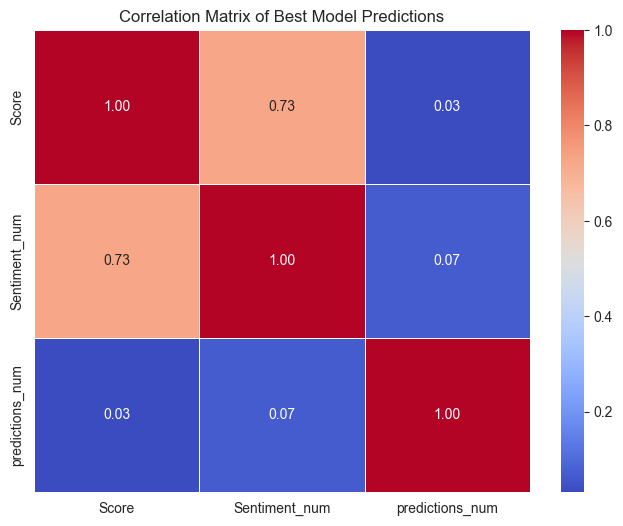

In [ ]:
best_model_predictions = pd.DataFrame({'predictions': test_rf_class})
combined_df = pd.concat([df, best_model_predictions], axis=1)

sentiment_mapping = {'Negatif': 0, 'Netral': 1, 'Positif': 2}
combined_df['Sentiment_num'] = combined_df['Sentiment'].map(sentiment_mapping)
combined_df['predictions_num'] = combined_df['predictions'].map(sentiment_mapping)

correlation_matrix = combined_df[['Score', 'Sentiment_num', 'predictions_num']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Best Model Predictions')
plt.show()

# Kata yang memengaruhi trend #KaburDuluAja

In [ ]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_words_bow = get_top_n_words(df['clean_comment'], n=20)
print("Top words from Bag of Words:")
for word, freq in top_words_bow:
    print(f"{word}: {freq}")

Top words from Bag of Words:
kaburajadulu: 1304
fyp: 429
indonesia: 356
di: 351
yang: 244
ini: 243
dan: 217
kabur: 211
aja: 173
fypシ: 159
kenshuseijapan: 154
ke: 149
negara: 138
dulu: 132
dari: 125
dengan: 122
viral: 119
negeri: 119
kerja: 113
jepang: 113


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21144\3995206493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in top_words_bow], y=[x[0] for x in top_words_bow], palette="coolwarm")
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


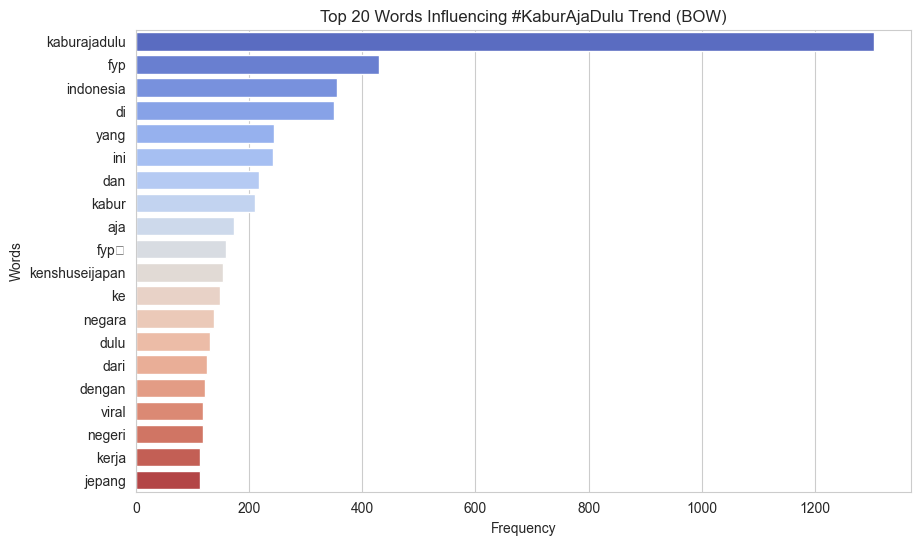

In [ ]:
# Visualisasi kata berpengaruh
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in top_words_bow], y=[x[0] for x in top_words_bow], palette="coolwarm")
plt.title("Top 20 Words Influencing #KaburAjaDulu Trend (BOW)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()